# Import the data

In [20]:
import pandas as pd
import zipfile

# DATABASE Packaging waste by waste management operations
link="./data/env_waspac_linear.csv"
df=pd.read_csv(link)
df.head()
df


,DATAFLOW,LAST UPDATE,freq,waste,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W1501,GEN,KG_HAB,AT,1997,138.43,NaN
1,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W1501,GEN,KG_HAB,AT,1998,139.78,NaN
2,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W1501,GEN,KG_HAB,AT,1999,141.39,NaN
3,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W1501,GEN,KG_HAB,AT,2000,146.04,NaN
4,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W1501,GEN,KG_HAB,AT,2001,136.36,NaN
...,...,...,...,...,...,...,...,...,...,...
110723,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W150199,RPR,T,UKN,2015,NaN,z
110724,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W150199,RPR,T,UKN,2016,NaN,z
110725,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W150199,RPR,T,UKN,2017,NaN,z
110726,ESTAT:ENV_WASPAC(1.0),25/03/22 11:00:00,A,W150199,RPR,T,UKN,2018,NaN,z


In [22]:
# DATABASE Recycling rates of packaging waste for monitoring compliance with policy targets, by type of packaging
link = "./data/env_waspacr_linear.csv"
#dateparser = lambda x: datetime.strptime(x, "%Y%m%dT%H%M%S")
df_waspacr = pd.read_csv(link)
df_waspacr


,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W1501,RT,AT,1997,64.5,NaN
1,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W1501,RT,AT,1998,64.9,NaN
2,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W1501,RT,AT,1999,65.6,NaN
3,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W1501,RT,AT,2000,69.4,NaN
4,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W1501,RT,AT,2001,64.3,NaN
...,...,...,...,...,...,...,...,...,...
4457,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W150199,RT,UK,2015,0.0,NaN
4458,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W150199,RT,UK,2016,0.0,NaN
4459,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W150199,RT,UK,2017,0.0,NaN
4460,ESTAT:ENV_WASPACR(1.0),25/03/22 11:00:00,A,W150199,RT,UK,2018,0.0,NaN


# Explore Data Analyse

In [2]:
# Info
# Describe
# Duplicate

# Fill nan (at least 10%)
# Drop or not duplicate / Nan value

# Info

df.info()

# Describe
df.describe()

# Duplicate
df.drop_duplicates(inplace=True)

# Fill nan (at least 10%)

#check na's per column 
df_size=df.shape[0]
print(df_size)
column_list=[]
total_na_list=[]
percentage_na_list=[]

for column in df.columns:
    column_list.append(column)
    
    total_na= df[column].isna().sum()
    total_na_list.append(total_na)
    percentage_na= round((total_na/df_size)*100,2)
    percentage_na_list.append(percentage_na) 
    
df_na=pd.DataFrame({"columns": column_list, "Amount of NA's": total_na_list, "% of NA's": percentage_na_list})
df_na

#check the number of NA's per row 

df_size=df.shape[0]
list_rows=[]
list_row_na=[]
list_percentage_row_na=[]

for i in range(0,df_size):
    list_rows.append(i)
    row_na= df.loc[[i]].isna().sum().sum()
    list_row_na.append(row_na)
    percentage_row_na= round((row_na/df_size)*100,3)
    list_percentage_row_na.append(percentage_row_na)
        
df_rows_na=pd.DataFrame({"row_number": list_rows, "Amount_NA's": list_row_na, "%_NA's": list_percentage_row_na})
df_rows_na.sort_values(by="Amount_NA's", ascending=False, inplace=True)
df_rows_na

#dropcolumns:
#based on the amount of %NA's per column, decide which columns to drop via:
columns_drop=[]
df.drop(labels= columns_drop, axis=1, inplace=True, errors='raise')

#drop rows:
#based on the amount of %NA's per row use the trashold of 10% 

total_columns=len(df.columns)         #check how many columns the dataframe has
trashold=round(0.9*total_columns)     #you want to drop the rows with less than 10% of data, which means it lacks data on 90% of the columns
print(trashold)
df_rows_to_drop=df_rows_na.loc[df_rows_na["Amount_NA's"] >= trashold,:]
df_rows_to_drop #this will tell us which rows we should drop from the original dataset, for that use a loc 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,row_number,Amount_NA's,%_NA's


/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_877/453655557.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


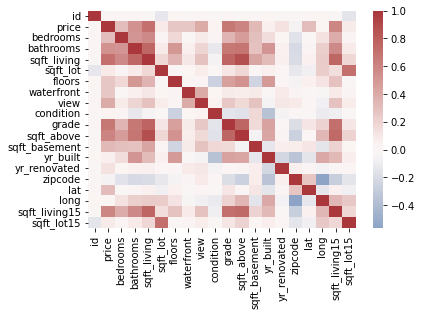

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge or join (make sure we have enough data)

#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False
#, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

#outer join
#EXAMPLE: outer_merged = pd.merge(precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"] )
    
#  FROM  https://realpython.com/pandas-merge-join-and-concat/
    
# Correlation (heatmap)

# df.corr(method='pearson', min_periods=1)

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
    
#EXAMPLE:  x.corr(y, method='spearman')  
#x.corr(y, method='kendall')

#FROM https://realpython.com/numpy-scipy-pandas-correlation-python/
    
#HEATMAP 

#seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, 
#                center=None, 
#                robust=False, annot=None, 
#                fmt='.2g', 
#                annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, 
#                cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', 
#                mask=None, ax=None, **kwargs)

#FROM https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig, ax = plt.subplots()
viz_correlation = sns.heatmap(df.corr(),center=0,cmap = sns.color_palette("vlag", as_cmap=True))

fig.show()

In [ ]:
# pairplot

sns.pairplot(df, kind="kde") 
    
#seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, 
#     y_vars=None, kind='scatter', diag_kind='auto'
#     , markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, 
#    diag_kws=None, grid_kws=None, size=None)
    
#EXAMPLE:The kind parameter determines both the diagonal and off-diagonal plotting style. 
#    Several options are available, including using kdeplot() to draw KDEs:

#sns.pairplot(penguins, kind="kde") 

#FROM https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [49]:
# Drop useless cols

# update columns ex dealing categorical columns ( factorisarion and dummies )

# pandas.factorize(values, sort=False, na_sentinel=- 1, size_hint=None)

# Encode the object as an enumerated type or categorical variable.

#This method is useful for obtaining a numeric representation of an array when all that matters is 
#identifying distinct values. factorize is available as both a top-level function pandas.factorize(), 
#and as a method Series.factorize() 
#and Index.factorize().

#FROM https://pandas.pydata.org/docs/reference/api/pandas.
 
#EXAMPLE: labels, uniques = pd.factorize(['q', 'q', 'p', 'r', 'q'])
#labels
#array([0, 0, 1, 2, 0], dtype=int64)

#FROM https://www.w3resource.com/pandas/factorize.php
    
#DUMMIES
# pandas.get_dummies()

#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, 
#columns=None, sparse=False, drop_first=False, dtype=None)


#FROM https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
    
# GroupBY
# DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, 
# group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)

#df.groupby(by=["b"]).sum()
#df.groupby(by=["b"], dropna=False).sum()

# FROM https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
    
# EXPLODE
#DataFrame.explode(column, ignore_index=False)

#explode team column
# df.explode('team')
# FROM https://www.statology.org/pandas-explode/





# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# Pivot table / Group by as example
# explode

IndentationError: unexpected indent (435076705.py, line 16)

# Classification

In [50]:
# Joao -> create a system loop to test the algorithms

# Logistic regression -> François
# Logistic regression + standard deviation ? -> François
# SVM -> Joao
# Decision tree
# KNNeighbours
# pipeline -> joana -> for KNN & decision tree 





# pipeline -> Fabien -> for SVM

# Grid search ?
# Confusion matrix ?
# Cross validation ?

In [2]:
# Classification methods
##Logistic regression
from sklearn.linear_model import LogisticRegression
## K neighbors
from sklearn.neighbors import KNeighborsClassifier
## Decision tree
from sklearn.tree import DecisionTreeClassifier
## Support vector machine
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

I selected titanic dataset to train and test the model to classify

In [6]:
# Data base to test
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic['survived'] = titanic['survived'].apply(lambda x: 'did not survive' if x == 0 else 'survived')
titanic.dropna(inplace=True)
# I select only the number to set the features in the following code
X = titanic.select_dtypes("number")

# then the target
y = titanic["survived"]

The loop for the test contains :
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. Pipeline + KNeighborsClassifier
4. Pipeline + DecisionTreeClassifier
5. Pipeline + SVM
6. LogisticRegression

In [83]:

models = [{'alg': KNeighborsClassifier(), 
           'param' : {'n_neighbors' : list(range(2,20)), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}},
          {'alg': DecisionTreeClassifier(),
           'param': {'max_depth': list(range(1, 20)), 'min_samples_leaf': list(range(1, 20)), 'criterion': ["gini", "entropy"]}},          
          #insert new model 
          {'alg': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),'param': {'knn__n_neighbors' : list(range(2,20))}},
          {'alg': Pipeline([('scaler', StandardScaler()), ('dtc', DecisionTreeClassifier())]), 'param': {'dtc__max_depth' : list(range(1,20)), 'dtc__min_samples_leaf': list(range(1,20))}},
          {'alg': Pipeline([('scaler', StandardScaler()), ('svm', svm.SVC())]), 'param': {"svm__kernel":["linear", "poly", "rbf", "sigmoid"], "svm__degree":list(range(1,20)), "svm__gamma":["scale", "auto"], "svm__decision_function_shape":["ovo", "ovr"] }},
          {"alg": LogisticRegression(), "param": {"random_state": list(range(2,10)), "max_iter": list(range(10000, 10010)), "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]} }
         ]   
# overall ml project
ml = {'metric': 'accuracy', 'models': models}

The loop test different models then display the best result (by accuracy)

In [46]:
for model in ml['models']:
    # model is a dictionary
    rando = RandomizedSearchCV(model['alg'], model['param'], scoring = ml['metric'])
    rando.fit(X,y)
    model['accuracy'] = rando.best_score_
    model['best_param'] = rando.best_params_

# We can get the best model by accuracy from the loop
ml['models'].sort(key=lambda x: x["accuracy"], reverse=True)
ml['models'][0]

{'alg': LogisticRegression(),
 'param': {'random_state': [2, 3, 4, 5, 6, 7, 8, 9],
  'max_iter': [10000,
   10001,
   10002,
   10003,
   10004,
   10005,
   10006,
   10007,
   10008,
   10009],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
 'accuracy': 0.703003003003003,
 'best_param': {'solver': 'lbfgs', 'random_state': 6, 'max_iter': 10000}}

We can keep grid search but mandatory for decision tree

Joao works first on the algorithm then add the other works

# NLP

In [47]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from ast import literal_eval
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# library to import text inb html
from urllib import request
from bs4 import BeautifulSoup

# Read the HTML from the URL
url = "https://en.wikipedia.org/wiki/Deep-water_soloing"
html = request.urlopen(url).read()

#regex = r"[>](.*?)[<\/]"

# Get text (clean html) using BeautifulSoup get_text method
sentences = BeautifulSoup(html).get_text()
#print(sentence)
# Tokenize or get words
tokens = nltk.word_tokenize(sentences)
#df = pd.DataFrame(tokens, columns=["words"])

In [49]:
# Function to change string array 
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else x

In [50]:
# this list allow us to set which columns to upload
#col_list = ['words']

Stops words settings

In [51]:
nltk.download('popular')
stop_words = nltk.corpus.stopwords.words("english") + ['"', "'", "'s", "-", "_",",","--",".", "of", "the"]

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package movie_reviews is already

Set the dataframe to analyse with NLP

In [52]:
# df_nlp = df[col_list].copy()
# data frame to test
df_nlp = pd.DataFrame(tokens, columns=["words"])
df_nlp.fillna(" ", inplace=True)

Here the content will be :
1. tokenize
2. clean from stop words
3. stemmize
4. lemmentize

In [53]:
# Get freq words from critics consensus
df_nlp["X"] = df_nlp["words"].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
freq = nltk.FreqDist(df_nlp["X"].sum())
# Data Frame word list
df_tokens = pd.DataFrame.from_dict(freq, orient='index')
df_tokens.columns = ['Frequency']
df_tokens.index.name = 'Term'

In [54]:
# Get freq clean words from critics consensus
df_nlp["X_clean"] = df_nlp["X"].apply(lambda tokens: [ w for w in tokens if w.lower() not in stop_words ])
freq_clean = nltk.FreqDist(df_nlp["X_clean"].sum())
# Data Frame clean word list
df_words = pd.DataFrame.from_dict(freq_clean, orient='index')
df_words.columns = ['Frequency']
df_words.index.name = 'Term'

In [55]:
porter = PorterStemmer()
df_nlp["X_stem"] = df_nlp["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
# change to dataFrame to see better final results
df_stem = pd.DataFrame.from_dict(nltk.FreqDist(df_nlp["X_stem"].sum()), orient='index')
df_stem.columns = ['Frequency']
df_stem.index.name = 'Term'

In [56]:
wnl = WordNetLemmatizer()
df_nlp["X_lem"] = df_nlp["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )
df_lem = pd.DataFrame.from_dict(nltk.FreqDist(df_nlp["X_lem"].sum()), orient='index')
df_lem.columns = ['Frequency']
df_lem.index.name = 'Term'

The following function create plots and wordcloud by words frequency by the different

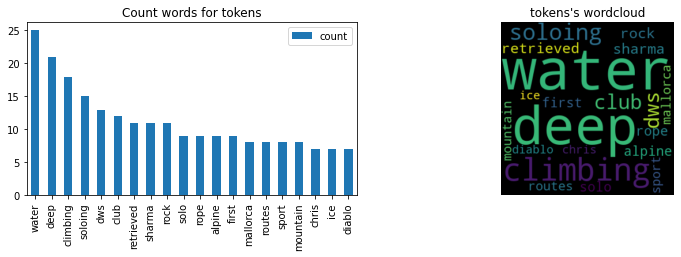

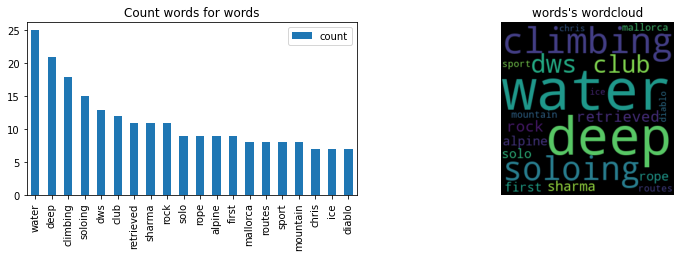

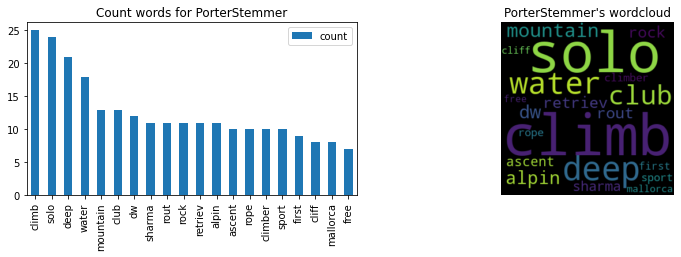

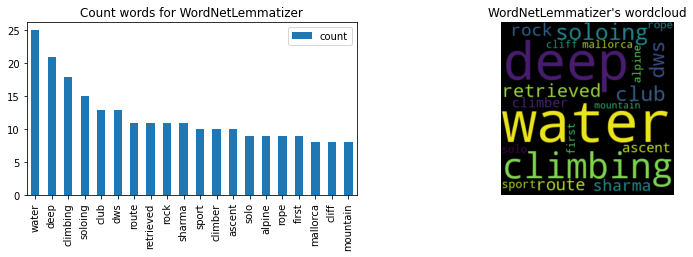

In [57]:
list_freq = [
    {"X": df_nlp["X"], "title": "tokens"},
    {"X": df_nlp["X_clean"], "title": "words"},
    {"X": df_nlp["X_stem"], "title": "PorterStemmer"},
    {"X": df_nlp["X_lem"], "title": "WordNetLemmatizer"}    
]

# Create a matrix with vectorise of any alpha word longer than 2 caracters
def get_count(X, name = "", max_features=20, stop_words=stop_words):
    vectorizer = CountVectorizer(max_features=max_features, stop_words=stop_words )
    text_matrix = vectorizer.fit_transform(X.apply(lambda wlist: " ".join(wlist)))
    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    
    fig = plt.subplots(figsize=(13,7))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)
    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())
    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)

for freq in list_freq:
    get_count(freq["X"], name = freq["title"])

# Linear regression


In [58]:
# François
from sklearn.linear_model import LogisticRegression

# Unsupervise algorithm

## KNearest Neighbours

In [ ]:
#took this from https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors

#Unsupervised Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
nbrs.kneighbors_graph(X).toarray()

In [ ]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

## Clustering

In [59]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [62]:
X = titanic.select_dtypes("number")
X

,pclass,age,sibsp,parch,fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


I use the elbow method to determine which is the best n cluster parameters

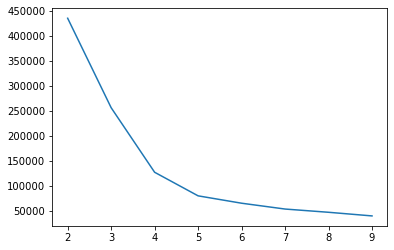

In [63]:
K = range(2, 10)
inertias = []
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
 
plt.plot(K, inertias)

Then I compare it with the silhouette method here to see if it is the good param n cluster

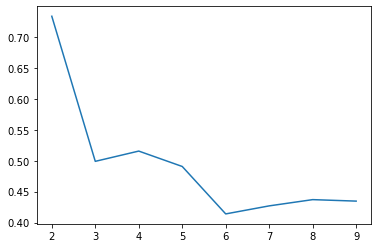

In [64]:
silhouette = []
for k in K:
    modelKM = KMeans(n_clusters=k)
    modelKM.fit(X)
    silhouette.append(round(metrics.silhouette_score(X, modelKM.labels_), 4))

plt.plot(K, silhouette)

In [65]:
modelKM = KMeans(n_clusters=2)
modelKM.fit(X)
titanic['cluster'] = modelKM.labels_.astype("int64")

<bound method Figure.show of <Figure size 1008x360 with 2 Axes>>

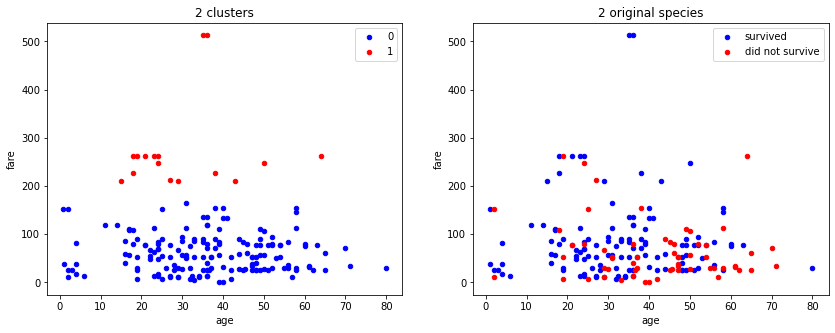

In [69]:
#define subplots
fig, ax = plt.subplots(1, 2, figsize=(14,5))

colors = ["blue","red"]

for i, c in enumerate(colors):
  titanic[titanic['cluster'] == i].plot(kind="scatter", x="age", y="fare", ax=ax[0], color=c)


for alive, c in zip(titanic["survived"].unique(), colors):
  titanic[titanic['survived'] == alive].plot(kind="scatter", x="age", y="fare", ax=ax[1], color=c)

ax[0].legend([0,1])
ax[1].legend(titanic["survived"].unique())
ax[0].set_title("2 clusters")
ax[1].set_title("2 original species")
fig.show

## PCA

In [ ]:
# Fabien

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [71]:
X = titanic.select_dtypes('number')
X.shape

(182, 6)

In [73]:
y = titanic["survived"]
y.shape

(182,)

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(182, 6)

In [76]:
pca = PCA()
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.38460522, 0.23570837, 0.14411485, 0.10735326, 0.10003184,
       0.02818646])

Here I determine how many main components dermine at least 70 % of the variance to understand if the model predict well the impact

In [75]:
pca = PCA(.7)
pca.fit(X_scaled)
print(len(pca.explained_variance_ratio_), "principal componants explain at 70% of the variance")

3 principal componants explain at 70% of the variance


Here I created a data frame with the 2 main components that explain the variance

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns = ["PCA 1", "PCA 2"])
df_pca["survived"] = y
df_pca["survived"].fillna("death", inplace=True)
df_pca.head()

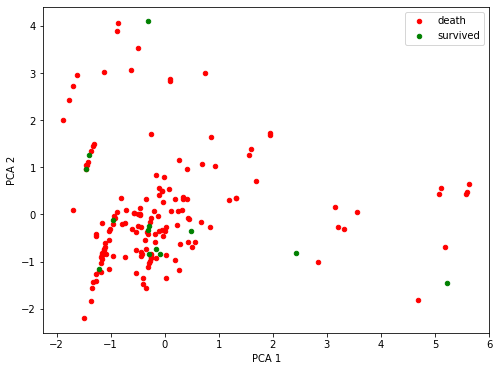

In [80]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colors = ["red", "green"]
for op, c in zip(df_pca["survived"].unique(), colors):
  df_pca[df_pca["survived"] == op].plot(kind="scatter", ax = ax, x="PCA 1", y="PCA 2", color=c)

ax.legend(df_pca["survived"].unique())

I add this code bcs with PCA we can create a better classification system like below

In [81]:
model = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.3)
model.fit(X_train,y_train)
#Predict Output
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.4909090909090909


In [82]:
model = KNeighborsClassifier(n_neighbors=5)
X = df_pca[["PCA 1","PCA 2"]]
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=.3)
# Train the model using the training sets
model.fit(X_train,y_train)
#Predict Output
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6181818181818182
